# Denoising Auto-Encoder

A denoising auto-encoder is forced to learn an error-correction vector space...

...thus an higher level feature space:

<img src="images/dae.png" width="500pt"/>

In [1]:
# Loading the tools:
%run autoencoders.py

print("Creating the net...")
autoencoder, encoder, decoder = create_net(l1_regularization=True)

Creating the net...


Loading the data...


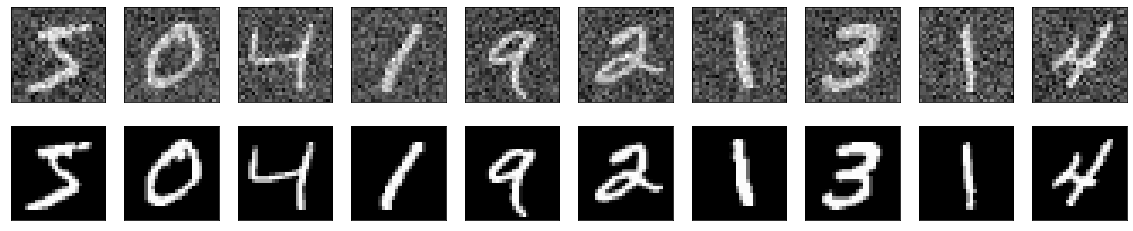

In [2]:
print("Loading the data...")

x_train, y_train, x_test, y_test = load_data(must_corrupt=True)

imshowcompare(x_train, y_train)

In [3]:
from tensorflow.keras.callbacks import TensorBoard

print("Training (phase 1)...")

train(
    net=autoencoder,
    train_data=(x_train, y_train), 
    validation_data=(x_test, y_test),
    callbacks=[TensorBoard(log_dir='generated/DAE')]
)

Training (phase 1)...
Epoch 1/30
938/938 [==============================] - 50s 52ms/step - loss: 0.2924 - val_loss: 0.1468
Epoch 2/30
938/938 [==============================] - 47s 50ms/step - loss: 0.1423 - val_loss: 0.1295
Epoch 3/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1286 - val_loss: 0.1223
Epoch 4/30
938/938 [==============================] - 50s 53ms/step - loss: 0.1220 - val_loss: 0.1188
Epoch 5/30
938/938 [==============================] - 49s 53ms/step - loss: 0.1183 - val_loss: 0.1149
Epoch 6/30
938/938 [==============================] - 49s 52ms/step - loss: 0.1158 - val_loss: 0.1126
Epoch 7/30
938/938 [==============================] - 49s 52ms/step - loss: 0.1134 - val_loss: 0.1108
Epoch 8/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1116 - val_loss: 0.1095
Epoch 9/30
938/938 [==============================] - 49s 52ms/step - loss: 0.1104 - val_loss: 0.1084
Epoch 10/30
938/938 [==============================] - 49s 5

In [4]:
# Saving the models separatedly and together:
autoencoder.save('generated/dae_autoencoder')
encoder.save('generated/dae_encoder')
decoder.save('generated/dae_decoder')

INFO:tensorflow:Assets written to: generated/dae_autoencoder/assets
INFO:tensorflow:Assets written to: generated/dae_encoder/assets
INFO:tensorflow:Assets written to: generated/dae_decoder/assets


In [5]:
from tensorflow.keras.models import load_model

# Loading the models back:
autoencoder = load_model('generated/dae_autoencoder')
encoder = load_model('generated/dae_encoder')
decoder = load_model('generated/dae_decoder')

Using the encoder/decoder pair to denoise...


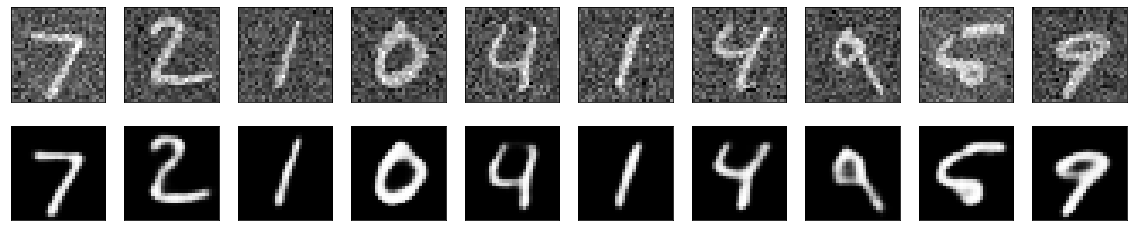

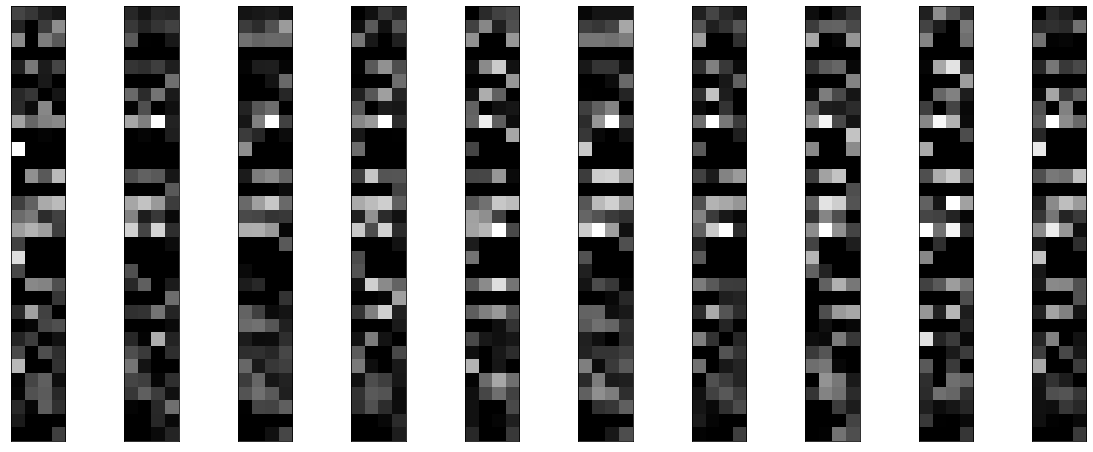

In [6]:
print("Using the encoder/decoder pair to denoise...")

encoded_imgs1 = encoder.predict(x_test)
decoded_imgs1 = decoder.predict(encoded_imgs1)

imshowcompare(x_test, decoded_imgs1)

plotfeatures(encoded_imgs1)

Using the encoder/decoder pair on original images...


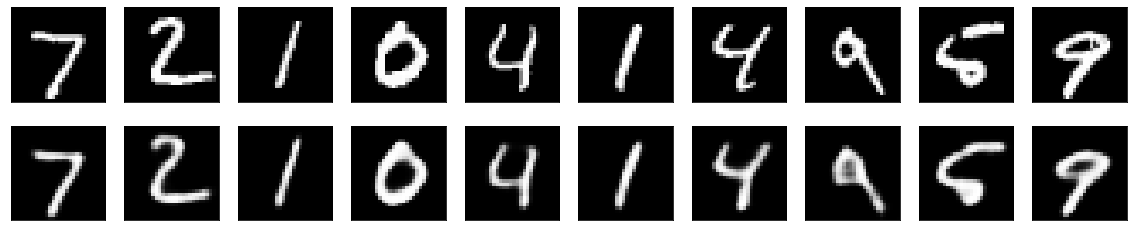

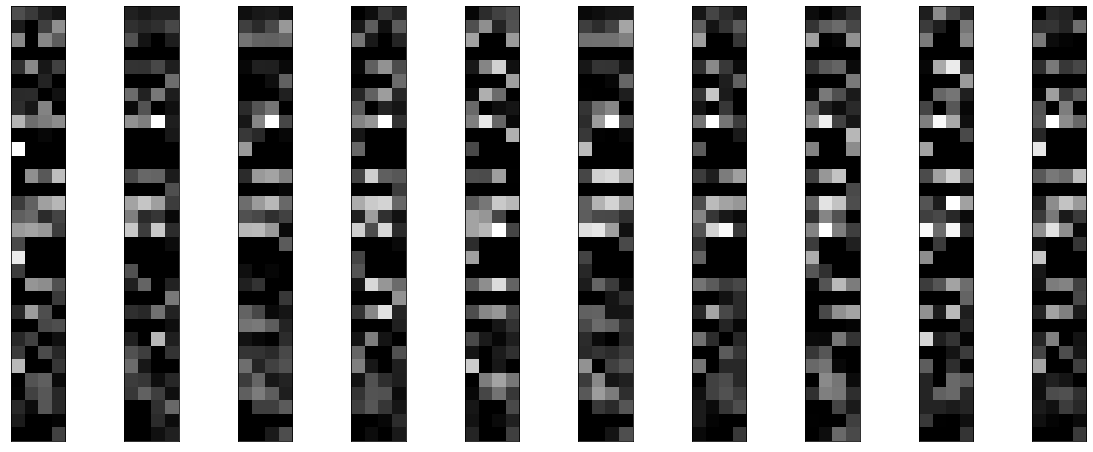

In [7]:
print("Using the encoder/decoder pair on original images...")

encoded_imgs2 = encoder.predict(y_test)
decoded_imgs2 = decoder.predict(encoded_imgs2)

imshowcompare(y_test, decoded_imgs2)

plotfeatures(encoded_imgs2)

In [8]:
# Is the noise managed by the encoder part?

difs = np.abs(encoded_imgs1-encoded_imgs2)
fmax = np.max(np.abs(encoded_imgs1))
emax = np.max(difs/fmax) * 100
print('max error: {:2.1f}%'.format(emax))

max error: 22.2%
